In [1]:
import pandas as pd
import numpy as np
from sportsipy.ncaab.teams import Teams
from sportsipy.ncaab.schedule import Schedule
from sportsipy.ncaab.boxscore import Boxscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
team_stats = pd.read_csv('/home/bszekely/Desktop/ProjectsResearch/March_Madness/cbb21.csv')
team_stats.drop(['BARTHAG','ADJ_T','WAB','SEED'],axis=1,inplace=True)
team_stats.head(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D
0,Michigan,B10,24,20,118.1,91.1,54.9,44.9,16.3,15.1,29.4,24.8,28.9,24.5,53.3,42.3,38.7,33.5
1,Baylor,B12,24,22,123.2,94.5,57.5,49.1,17.6,24.6,37.5,30.9,27.0,31.7,54.1,48.1,41.8,34.0
2,Illinois,B10,29,23,117.7,90.4,55.6,46.6,18.2,16.1,33.0,22.2,39.2,30.5,55.3,45.4,37.6,32.7
3,Gonzaga,WCC,26,26,125.4,89.8,61.0,47.5,16.1,20.3,30.4,23.4,36.7,25.9,64.0,46.8,36.5,32.5
4,Iowa,B10,29,21,123.5,95.7,54.6,48.3,13.3,16.3,30.7,28.6,32.0,22.6,52.4,45.8,38.6,34.8


In [18]:
teams = Teams()
for team in team_stats['TEAM']:
    if 'St. ' in team:
        team1_update = team.replace('St. ','ST-')
        team1_sportspy = teams(team1_update)
        continue
    if 'St.' in team:                                                  
        team1_update = team.replace(' St.','-State')                   
        if ' ' in team1_update:                                         
            team1_update_2 = team1_update.replace(' ','-')              
            team1_sportspy = teams(team1_update_2)                      
        else:                                                           
            team1_sportspy = teams(team1_update)


ValueError: Team abbreviation Mount ST-Mary's not found

In [3]:
dataframe_temp = np.zeros([len(team_stats.index)])
for ind in range(len(team_stats.index)):
    if team_stats['CONF'][ind] == 'B10':
        dataframe_temp[ind] = 1
    elif team_stats['CONF'][ind] == 'B12':
        dataframe_temp[ind] = 1
    elif team_stats['CONF'][ind] == 'ACC':
        dataframe_temp[ind] = 1
    elif team_stats['CONF'][ind] == 'BE':
        dataframe_temp[ind] = 1
    elif team_stats['CONF'][ind] == 'P12':
        dataframe_temp[ind] = 1
    elif team_stats['CONF'][ind] == 'SEC':
        dataframe_temp[ind] = 1
    else:
        dataframe_temp[ind] = 0;
index = team_stats.index
a_list = list(index)
team_stats['Conference_Bool']=pd.Series(data=dataframe_temp,index=a_list)
team_stats.drop(['CONF'],axis=1,inplace=True)

In [4]:
team_stats.head()

,TEAM,G,W,ADJOE,ADJDE,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,Conference_Bool
0,Michigan,24,20,118.1,91.1,54.9,44.9,16.3,15.1,29.4,24.8,28.9,24.5,53.3,42.3,38.7,33.5,1.0
1,Baylor,24,22,123.2,94.5,57.5,49.1,17.6,24.6,37.5,30.9,27.0,31.7,54.1,48.1,41.8,34.0,1.0
2,Illinois,29,23,117.7,90.4,55.6,46.6,18.2,16.1,33.0,22.2,39.2,30.5,55.3,45.4,37.6,32.7,1.0
3,Gonzaga,26,26,125.4,89.8,61.0,47.5,16.1,20.3,30.4,23.4,36.7,25.9,64.0,46.8,36.5,32.5,0.0
4,Iowa,29,21,123.5,95.7,54.6,48.3,13.3,16.3,30.7,28.6,32.0,22.6,52.4,45.8,38.6,34.8,1.0


In [5]:
#Aggregate training data
X = team_stats[['ADJOE','ADJDE','EFG_O','EFG_D',
              'TOR','TORD','ORB','DRB','Conference_Bool',
                'FTR','FTRD','2P_O','2P_D','3P_O','3P_D']]
y = team_stats['W']

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5)

In [89]:
team1_name = 'Appalachian St.'
team2_name = 'Norfolk St.'
findteam1 = team_stats['TEAM']== team1_name
team_vector1 = team_stats[['ADJOE','ADJDE','EFG_O','EFG_D',
              'TOR','TORD','ORB','DRB','Conference_Bool',
                'FTR','FTRD','2P_O','2P_D','3P_O','3P_D']][findteam1]
findteam2 = team_stats['TEAM']== team2_name
team_vector2 = team_stats[['ADJOE','ADJDE','EFG_O','EFG_D',
              'TOR','TORD','ORB','DRB','Conference_Bool',
                'FTR','FTRD','2P_O','2P_D','3P_O','3P_D']][findteam2]
team1_np =team_vector1.to_numpy()
team2_np =team_vector2.to_numpy()

diff = [a - b for a, b in zip(team1_np, team2_np)]
arr = np.array(diff)
nx, ny = arr.shape
final_vector = arr.reshape((1,nx*ny))

diff = [b - a for a, b in zip(team1_np, team2_np)]
arr = np.array(diff)
nx, ny = arr.shape
final_vector2 = arr.reshape((1,nx*ny))

print('Probability that ' + team1_name + ' wins:', model.predict(final_vector))
print('Probability that ' + team2_name + ' wins:', model.predict(final_vector2))

Probability that Appalachian St. wins: [6.74317569]
Probability that Norfolk St. wins: [15.56290895]


Text(0.5, 1.0, 'NCAA MENS BASKETBALL')

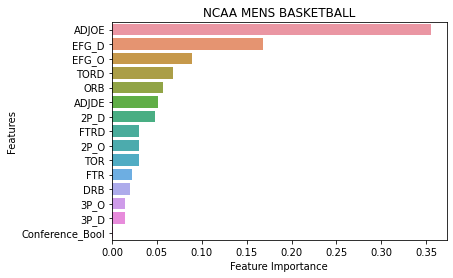

In [27]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
import seaborn as sns
plot1 = plt.figure(1)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('NCAA MENS BASKETBALL')